# Import Libraries

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/groceries/EDA


# Connection to the DB

In [2]:

conn = sqlite3.connect('../groceries_database.db')  
query = "SELECT * FROM flour_table"
df = pd.read_sql_query(query, conn)

conn.close()

print(df.head())


  product_type web-scraper-order  \
0        flour      1698753392-1   
1        flour      1698753392-2   
2        flour      1698753392-3   
3        flour      1698753392-4   
4        flour      1698753392-5   

                               web-scraper-start-url  \
0  https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
1  https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
2  https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
3  https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
4  https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   

                                productname_raw  price_raw  weight_raw  \
0               NATURE SUISSE BIO Halbweissmehl       2.99         1.0   
1                        HAPPY HARVEST Zopfmehl       1.99         1.0   
2                        HAPPY HARVEST Ruchmehl       2.19         1.0   
3                       HAPPY HARVEST Weissmehl       0.99         1.0   
4  HAPPY HARVEST Brotbackmischung, Vollkornbrot       1.99         1.0   

 

# Non graphical analysis    

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('../groceries_database.db') 

query = '''
    SELECT product_type, Supermarkt, price_per_kg
    FROM flour_table
'''

df_all = pd.read_sql_query(query, conn)

if not df_all.empty:
    average_prices = df_all.groupby(['Supermarkt', 'product_type'])['price_per_kg'].mean()
    print("Average prices per product and supermarket:")
    print(average_prices)

    cheapest_avg_price = df_all.groupby('product_type')['price_per_kg'].min()
    print("\nCheapest average price per product:")
    print(cheapest_avg_price)

    for product in df_all['product_type'].unique():
        cheapest_supermarket = df_all[df_all['product_type'] == product].sort_values(by='price_per_kg').iloc[0]['Supermarkt']
        print(f"\Cheapest Supermarkt für {product}: {cheapest_supermarket}")

    std_dev_prices = df_all.groupby(['Supermarkt', 'product_type'])['price_per_kg'].std()
    print("\nStandard deviation of prices per product and supermarket:")
    print(std_dev_prices)

    overall_avg_price = df_all['price_per_kg'].mean()
    print("\nOverall average price across all products and supermarkets:")
    print(overall_avg_price)
else:
    print("The query returned no results.")


Average prices per product and supermarket:
Supermarkt  product_type
Aldi        flour           2.520769
Coop        flour           2.899310
Migros      flour           3.240000
Name: price_per_kg, dtype: float64

Cheapest average price per product:
product_type
flour    0.8
Name: price_per_kg, dtype: float64
\Cheapest Supermarkt für flour: Coop

Standard deviation of prices per product and supermarket:
Supermarkt  product_type
Aldi        flour           0.939312
Coop        flour           1.190909
Migros      flour           1.069073
Name: price_per_kg, dtype: float64

Overall average price across all products and supermarkets:
2.9529850746268655


## Frequencies

In [4]:
print(df_all[df_all['product_type'] == 'flour']['Supermarkt'].value_counts())

Supermarkt
Coop      29
Migros    25
Aldi      13
Name: count, dtype: int64


## Calculations:

In [5]:
import pandas as pd


mean_value = df['price_per_kg'].mean()


median_value = df['price_per_kg'].median()

q_quantile = df['price_per_kg'].quantile(0.25)

variance = df['price_per_kg'].var()

std_dev = df['price_per_kg'].std()

range_value = df['price_per_kg'].max() - df['price_per_kg'].min()

print(f"Arithmetic mean: {mean_value}")
print(f"Median: {median_value}")
print(f"25% Quantil: {q_quantile}")
print(f"Variance: {variance}")
print(f"Standard deviation: {std_dev}")
print(f"span: {range_value}")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df[['weight_raw']]
y = df['price_per_kg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Arithmetic mean: 2.9529850746268655
Median: 2.95
25% Quantil: 2.1950000000000003
Variance: 1.2469788331071916
Standard deviation: 1.1166820644691986
span: 5.6000000000000005


Mean Squared Error: 0.6598175436378257


# Graphical representation

Index(['product_type', 'Supermarkt', 'price_per_kg'], dtype='object')


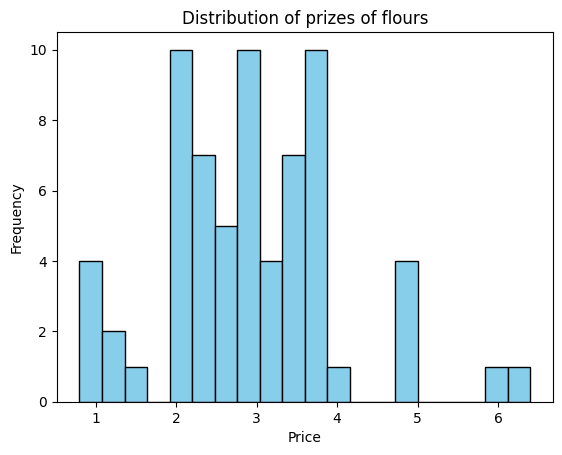

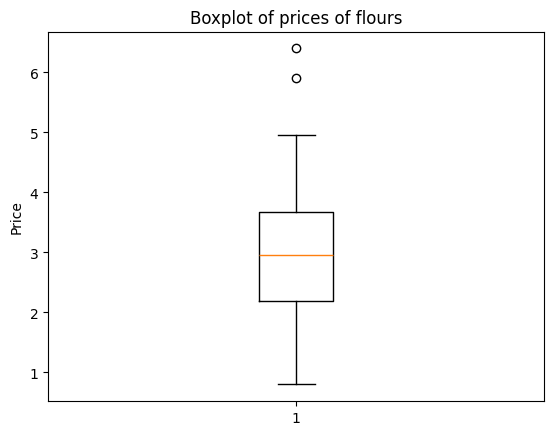

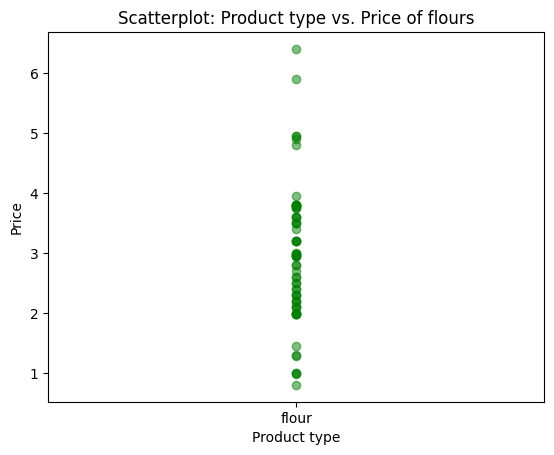

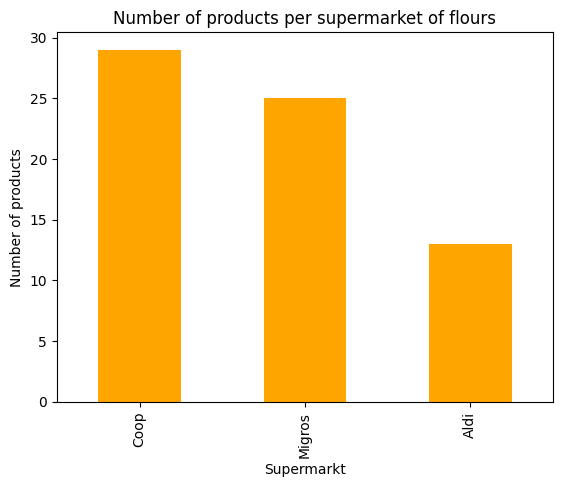

In [6]:

print(df_all.columns)


plt.hist(df_all['price_per_kg'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of prizes of flours')
plt.show()


plt.boxplot(df_all['price_per_kg'])
plt.ylabel('Price')
plt.title('Boxplot of prices of flours')
plt.show()


plt.scatter(df_all['product_type'], df_all['price_per_kg'], alpha=0.5, color='green')
plt.xlabel('Product type')
plt.ylabel('Price')
plt.title('Scatterplot: Product type vs. Price of flours')
plt.show()


df_all['Supermarkt'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Supermarkt')
plt.ylabel('Number of products')
plt.title('Number of products per supermarket of flours')
plt.show()


## Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['weight_raw']]
y = df['price_per_kg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.6598175436378257


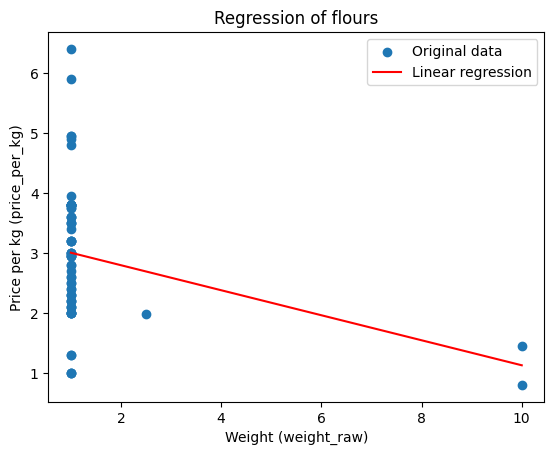

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['weight_raw'], df['price_per_kg'], label='Original data')

x_range = np.linspace(df['weight_raw'].min(), df['weight_raw'].max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)

plt.plot(x_range, y_range, color='red', label='Linear regression')

plt.xlabel('Weight (weight_raw)')
plt.ylabel('Price per kg (price_per_kg)')
plt.legend()
plt.title('Regression of flours')
plt.show()


## Classification

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[['weight_raw', 'Supermarkt']]

X = pd.get_dummies(X, columns=['Supermarkt'], drop_first=True)

y = pd.cut(df['price_per_kg'], bins=[0, 1, 2, 3, float('inf')], labels=['attractively priced', 'cheap', 'medium', 'expensive'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.35714285714285715


## Model evaluation for regression (e.g. R-Squared, RMSE):

In [10]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy (Train): {accuracy_train}")
print(f"Accuracy (Test): {accuracy_test}")


Accuracy (Train): 0.4716981132075472
Accuracy (Test): 0.35714285714285715


## Model evaluation for classification (e.g. accuracy, recall, precision):

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)

recall_test = recall_score(y_test, y_test_pred, average=None)

precision_test = precision_score(y_test, y_test_pred, average=None)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy (Train): {accuracy_train}")
print(f"Accuracy (Test): {accuracy_test}")
print(f"Recall (Test): {recall_test}")
print(f"Precision (Test): {precision_test}")
print(f"Confusion matrix (Test):\n{conf_matrix_test}")


Accuracy (Train): 0.4716981132075472
Accuracy (Test): 0.35714285714285715
Recall (Test): [0.66666667 0.33333333 0.2       ]
Precision (Test): [0.4 0.5 0.2]
Confusion matrix (Test):
[[2 0 1]
 [1 2 3]
 [2 2 1]]


## Correct interpretation of model results and measures of fit.

In [12]:
from sklearn.metrics import accuracy_score

y_test_pred = model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy (Test): {accuracy_test}")


Accuracy (Test): 0.35714285714285715


# K-Clustering

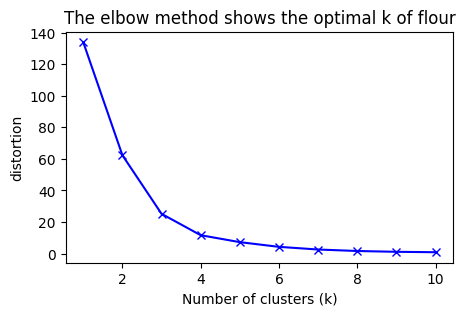

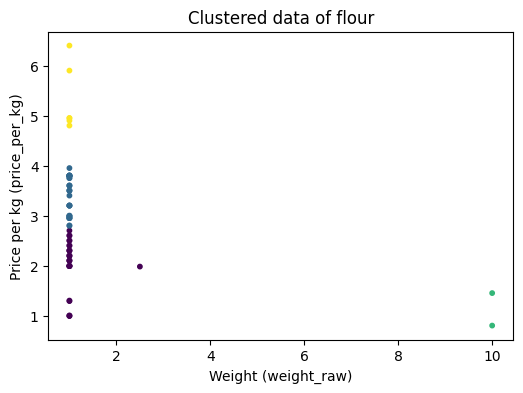

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features_for_clustering = df[['weight_raw', 'price_per_kg']]

scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

distortions = []
K = range(1, 11)

for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(features_for_clustering_scaled)
    distortions.append(kmeans_model.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('distortion')
plt.title('The elbow method shows the optimal k of flour')
plt.show()

num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(features_for_clustering_scaled)

df['cluster'] = kmeans.labels_

plt.figure(figsize=(6, 4))
plt.scatter(df['weight_raw'], df['price_per_kg'], c=df['cluster'], cmap='viridis', s=10)
plt.title("Clustered data of flour")
plt.xlabel("Weight (weight_raw)")
plt.ylabel("Price per kg (price_per_kg)")
plt.show()


# ANOVA (Analysis of Variance):

In [14]:
from scipy.stats import f_oneway

anova_result = f_oneway(*[group['price_per_kg'] for name, group in df.groupby('Supermarkt')])

p_value_anova = anova_result.pvalue

print(f"P-Wert (ANOVA): {p_value_anova}")

if p_value_anova < 0.05:
    print("There is a significant difference in prices between supermarkets.")
else:
    print("There is no significant difference in prices between supermarkets.")

P-Wert (ANOVA): 0.16061128768879415
There is no significant difference in prices between supermarkets.


# Comparing

## average price

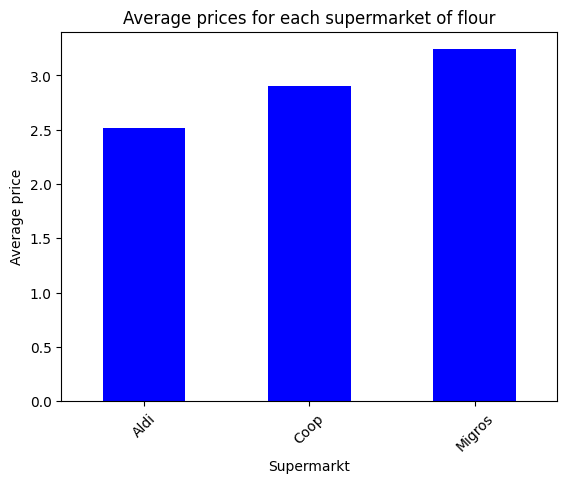

In [15]:
query = "SELECT * FROM flour_table"
df_all = pd.read_sql_query(query, conn)

df_all['price_per_kg'] = pd.to_numeric(df_all['price_per_kg'], errors='coerce')
df_all['Supermarkt'] = df_all['Supermarkt'].astype(str)

average_prices = df_all.groupby('Supermarkt')['price_per_kg'].mean()

average_prices.plot(kind='bar', color='blue')
plt.xlabel('Supermarkt')
plt.ylabel('Average price')
plt.title('Average prices for each supermarket of flour')
plt.xticks(rotation=45)
plt.show()

## max-price

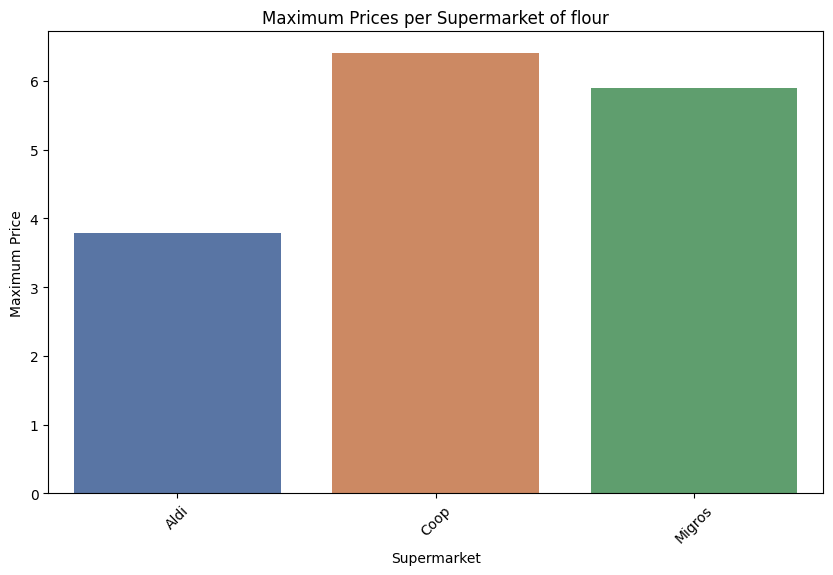

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the maximum price for each supermarket
max_prices = df_all.groupby('Supermarkt')['price_per_kg'].max().reset_index()

# Bar chart for maximum prices
plt.figure(figsize=(10,6))
sns.barplot(x='Supermarkt', y='price_per_kg', data=max_prices, palette='deep')
plt.xlabel('Supermarket')
plt.ylabel('Maximum Price')
plt.title('Maximum Prices per Supermarket of flour')
plt.xticks(rotation=45)
plt.show()


## min price

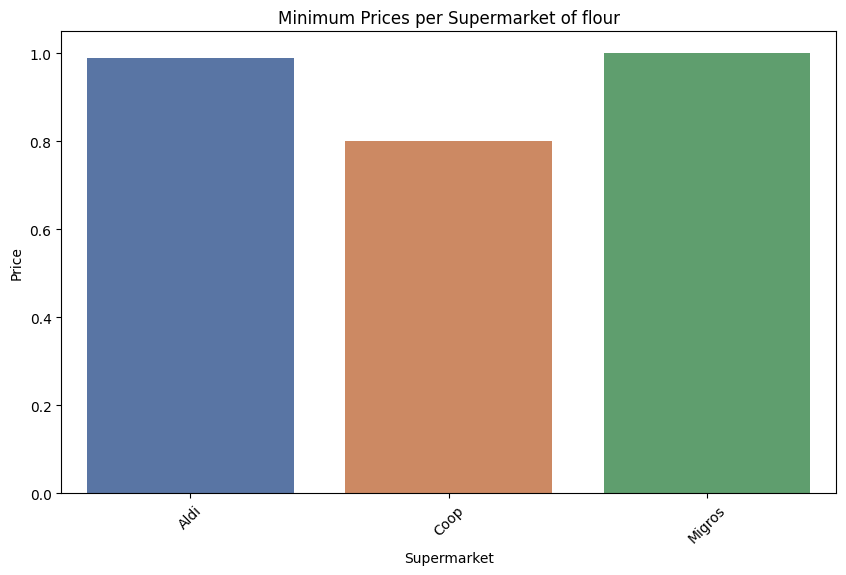

In [17]:
# Calculate the minimum price for each supermarket
min_prices = df_all.groupby('Supermarkt')['price_per_kg'].min().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Supermarkt', y='price_per_kg', data=min_prices, palette='deep')
plt.xlabel('Supermarket')
plt.ylabel('Price')
plt.title('Minimum Prices per Supermarket of flour')
plt.xticks(rotation=45)
plt.show()
